In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("ETH.csv")

In [5]:
df["close"]

0          504.861587
1          505.566588
2          503.276051
3          503.846464
4          504.394325
             ...     
262785    2078.623529
262786    2075.262659
262787    2075.481625
262788    2075.273822
262789    2075.340470
Name: close, Length: 262790, dtype: float64

In [6]:
import matplotlib.pyplot as plt

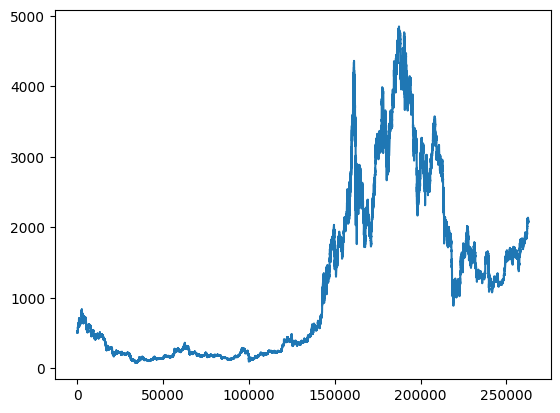

In [7]:
plt.plot(df["close"])

In [8]:
import numpy as np

In [9]:
arr = df["close"].to_numpy()[:262656]

In [10]:
# use the mean to compute the price of every 60 minute
arr = arr.reshape(-1,6*24).mean(axis = 1)

1824


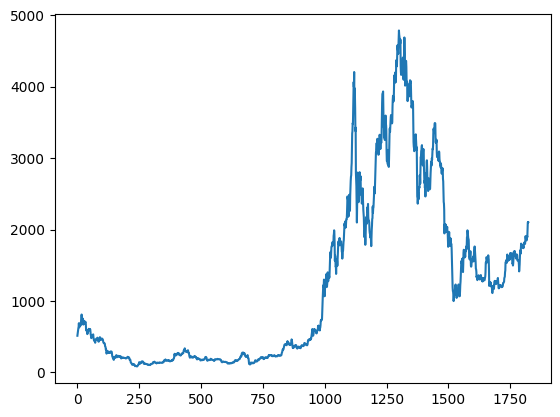

In [11]:
plt.figure()
plt.plot(arr)
print(len(arr))

In [12]:
#label the data 0 - nothing 1 - buy 2 - sell

# Generate example market close prices
market_close_prices = arr

# Define window size for the SMA
sma_window = 3

# Initialize labels array
labels = []

# Loop through the market close prices
for i in range(len(market_close_prices)):
    # Skip the first few prices until we have enough data for the SMA
    if i < sma_window - 1:
        labels.append(0)
        continue
    
    # Calculate the SMA for the current window
    sma_current = np.mean(market_close_prices[i - sma_window + 1:i + 1])
    
    # Calculate the SMA for the previous window
    sma_previous = np.mean(market_close_prices[i - sma_window:i])
    
    # If the current SMA is greater than the previous SMA, label as "buy"
    if sma_current > sma_previous:
        labels.append(1)
    # If the current SMA is less than the previous SMA, label as "sell"
    else:
        labels.append(2)

# Print the labeled data
for i in range(len(market_close_prices)):
    print("Price: {} \t Label: {}".format(market_close_prices[i], labels[i]))

Price: 513.7736496370021 	 Label: 0
Price: 542.9469702973696 	 Label: 0
Price: 584.2328185441066 	 Label: 2
Price: 603.6574428639508 	 Label: 1
Price: 621.5837282858379 	 Label: 1
Price: 637.9055717356059 	 Label: 1
Price: 689.2397090525784 	 Label: 1
Price: 643.0059618974476 	 Label: 1
Price: 631.2769787511455 	 Label: 2
Price: 665.0551853796259 	 Label: 2
Price: 676.6787489587704 	 Label: 1
Price: 684.3502193759277 	 Label: 1
Price: 682.0109523814601 	 Label: 1
Price: 657.6038915107687 	 Label: 2
Price: 679.1097387148225 	 Label: 2
Price: 734.7813646448906 	 Label: 1
Price: 782.8328383378747 	 Label: 1
Price: 810.8464935086582 	 Label: 1
Price: 793.2716301141369 	 Label: 1
Price: 742.7829093756186 	 Label: 2
Price: 748.9469285962405 	 Label: 2
Price: 739.2410072339189 	 Label: 2
Price: 753.033631439323 	 Label: 1
Price: 697.6611339404272 	 Label: 2
Price: 670.1083297093171 	 Label: 2
Price: 703.0323481290509 	 Label: 2
Price: 717.348544756241 	 Label: 1
Price: 723.0329006170394 	 Lab

/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


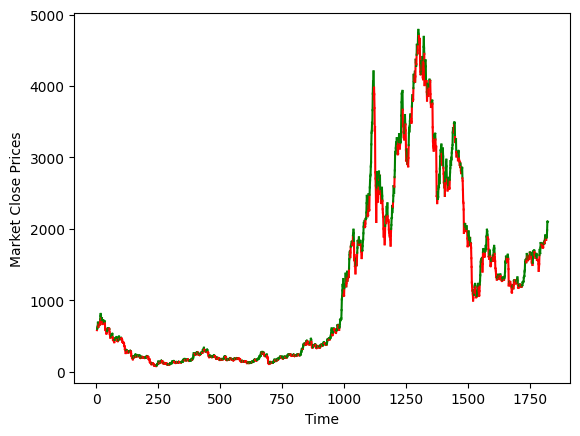

In [13]:

fig, ax = plt.subplots()

for i in range(len(market_close_prices)-1):
    if labels[i] == 1:
        ax.plot([i,i+1], market_close_prices[i:i+2], color='green', label='Buy')
    elif labels[i] == 2:
        ax.plot([i,i+1], market_close_prices[i:i+2], color='red', label='Sell')
ax.set_xlabel('Time')
ax.set_ylabel('Market Close Prices')
plt.savefig('foo.svg', dpi=3000)
plt.show()

In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Generate sample data (replace this with your actual historical price and label data)
prices = market_close_prices

# Create input sequences with past 20 data points
window_size = 20
X = []
y = []
for i in range(len(prices) - window_size):
    X.append(prices[i:i+window_size])
    y.append(labels[i+window_size])

X = np.array(X)
y = np.array(y)

# Convert labels to one-hot encoding
y_one_hot = np.zeros((len(y), 2))
y_one_hot[np.arange(len(y)), y.flatten() - 1] = 1

# Create a sequential neural network model
model = Sequential()

# Add input layer with 20 input neurons (for past 20 data points)
model.add(Dense(units=8, input_dim=window_size, activation='relu'))

# Add hidden layers
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add output layer with 2 output neurons (for buy or sell labels)
model.add(Dense(units=2, activation='softmax'))
?
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y_one_hot, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1) + 1

# Evaluate the model
accuracy = np.mean(predicted_labels == y.flatten()) * 100
print("Accuracy: {:.2f}%".format(accuracy))

Epoch 1/100
57/57 [==============================] - 0s 510us/step - loss: 71.5950 - accuracy: 0.4961
Epoch 2/100
57/57 [==============================] - 0s 510us/step - loss: 7.2993 - accuracy: 0.5155
Epoch 3/100
57/57 [==============================] - 0s 440us/step - loss: 5.8513 - accuracy: 0.5127
Epoch 4/100
57/57 [==============================] - 0s 464us/step - loss: 5.4553 - accuracy: 0.4978
Epoch 5/100
57/57 [==============================] - 0s 479us/step - loss: 3.9168 - accuracy: 0.5432
Epoch 6/100
57/57 [==============================] - 0s 462us/step - loss: 3.5580 - accuracy: 0.5366
Epoch 7/100
57/57 [==============================] - 0s 451us/step - loss: 3.3832 - accuracy: 0.5283
Epoch 8/100
57/57 [==============================] - 0s 476us/step - loss: 4.1723 - accuracy: 0.5072
Epoch 9/100
57/57 [==============================] - 0s 477us/step - loss: 2.1179 - accuracy: 0.5549
Epoch 10/100
57/57 [==============================] - 0s 459us/step - loss: 3.6464 - accur

57/57 [==============================] - 0s 459us/step - loss: 0.7399 - accuracy: 0.6691
Epoch 82/100
57/57 [==============================] - 0s 454us/step - loss: 0.7553 - accuracy: 0.6585
Epoch 83/100
57/57 [==============================] - 0s 461us/step - loss: 0.9088 - accuracy: 0.6269
Epoch 84/100
57/57 [==============================] - 0s 449us/step - loss: 0.7702 - accuracy: 0.6535
Epoch 85/100
57/57 [==============================] - 0s 441us/step - loss: 0.8273 - accuracy: 0.6580
Epoch 86/100
57/57 [==============================] - 0s 469us/step - loss: 0.7215 - accuracy: 0.6774
Epoch 87/100
57/57 [==============================] - 0s 453us/step - loss: 0.8038 - accuracy: 0.6458
Epoch 88/100
57/57 [==============================] - 0s 469us/step - loss: 0.8041 - accuracy: 0.6563
Epoch 89/100
57/57 [==============================] - 0s 477us/step - loss: 0.9368 - accuracy: 0.6242
Epoch 90/100
57/57 [==============================] - 0s 455us/step - loss: 0.6700 - accuracy: 